In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from hydra import initialize, compose
from lenstronomy.Plots import plot_util

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='../../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import overplot, plot
from mejiro.lenses import test
from mejiro.lenses.test import SampleSkyPyLens
from mejiro.helpers import lenstronomy_sim, pyhalo

In [2]:
array_dir = os.path.join(array_dir, 'sample_skypy_lens')
pickle_dir = os.path.join(pickle_dir, 'pyhalo')

In [3]:
lens_dict, rgb_image, rgb_model = test.get_sample(config.machine.sample_dir, config.machine.color_dir, 191)

lens = lens_dict['lens']
model = lens_dict['model']

side = 10
lens.update_model()

pandeia = rgb_image

In [5]:
# pandeia = np.load(os.path.join(array_dir, 'sample_skypy_lens_5_10000.npy'))

# lens = SampleSkyPyLens()
# num_pix = 45
# side = 4.95

# # add CDM subhalos; NB same subhalo population for all
# lens.add_subhalos(*pyhalo.unpickle_subhalos(os.path.join(pickle_dir, 'cdm_subhalos_tuple')))

# model = lens.get_array(num_pix=num_pix, side=side)

In [6]:
roman, roman_data_class = lenstronomy_sim.get_image(lens, 'roman', side)
roman_rgb, roman_rgb_data_class = lenstronomy_sim.get_image(lens, 'roman_rgb', side)
lsst, lsst_data_class = lenstronomy_sim.get_image(lens, 'lsst', side)
des, des_data_class = lenstronomy_sim.get_image(lens, 'des', side)
hst, hst_data_class = lenstronomy_sim.get_image(lens, 'hst', side)
euclid, euclid_data_class = lenstronomy_sim.get_image(lens, 'euclid', side)

In [7]:
scale_max = 50

roman = plot_util.sqrt(roman, scale_min=0, scale_max=scale_max)
roman_rgb = plot_util.sqrt(roman_rgb, scale_min=0, scale_max=scale_max)
lsst = plot_util.sqrt(lsst, scale_min=0, scale_max=scale_max)
des = plot_util.sqrt(des, scale_min=0, scale_max=scale_max)
hst = plot_util.sqrt(hst, scale_min=0, scale_max=scale_max)
euclid = plot_util.sqrt(euclid, scale_min=0, scale_max=scale_max)
pandeia = plot_util.sqrt(pandeia, scale_min=0, scale_max=scale_max)

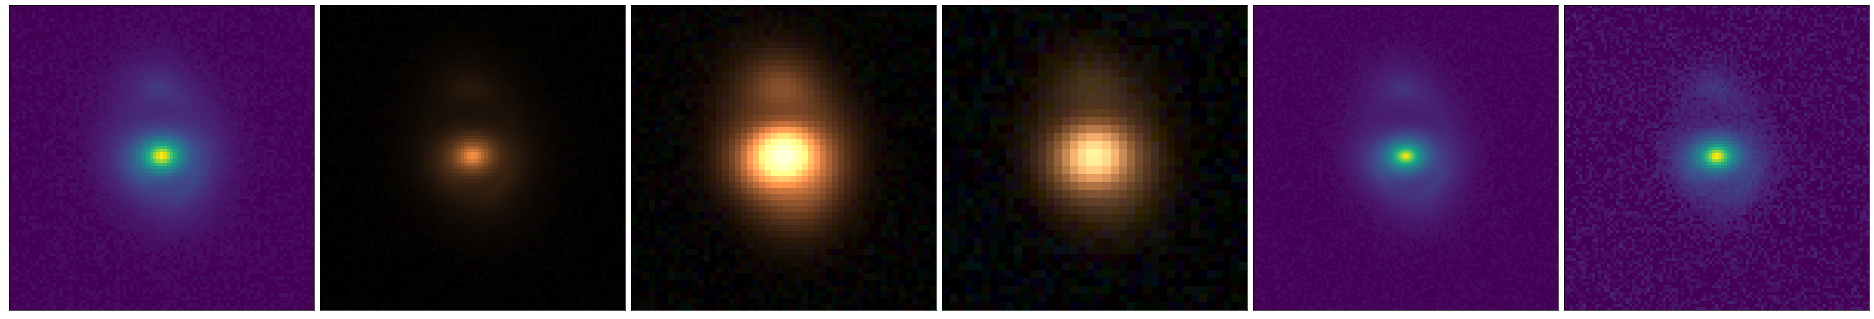

In [8]:
plot.plot_list([roman, roman_rgb, lsst, des, hst, euclid]) 

In [22]:
array_list = [pandeia, lsst, hst, euclid]
title_list = ['Roman\n(F106, F129, F184)', 'LSST\n(g, r, i)', 'HST\n(WFC3 F160W)', 'Euclid\n(VIS)']

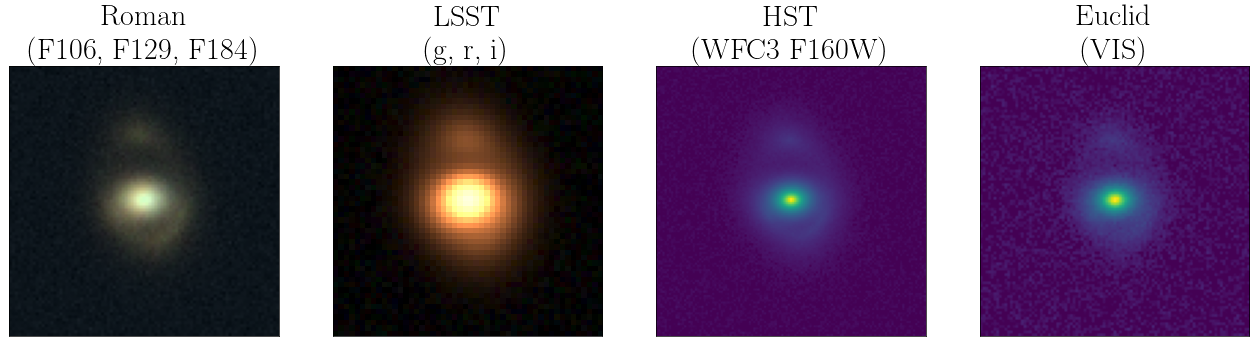

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=len(array_list), figsize=(16, 4))  # , gridspec_kw={'hspace': 0.02, 'wspace': 0.02}

# fontsize = 16
# matplotlib.rcParams.update({'font.size': fontsize})

for i, array in enumerate(array_list):
    ax[i].imshow(array)
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)
    ax[i].set_title(title_list[i])

plt.savefig(os.path.join(figure_dir, 'telescope_compare.png'))
plt.show()